<a href="https://colab.research.google.com/github/alchemistcohen/Bank-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Fraud Detection

## Import libraries y Database

In [14]:
!pip install imbalanced-learn


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [16]:
import pandas as pd

url = "https://huggingface.co/datasets/JEFFREY-VERDIERE/Creditcard/resolve/main/creditcard.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

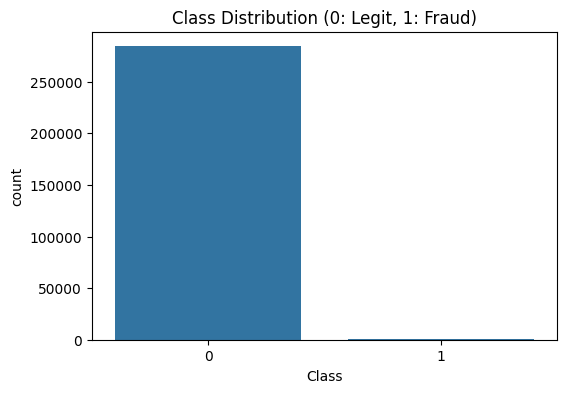

In [17]:
print(df.shape)
print(df.head())
print(df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()


##  Split into train/test

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training target counts: {y_train.value_counts()}")


Training target counts: Class
0    227451
1       394
Name: count, dtype: int64


## Handle imbalance with SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE oversampling:")
print(pd.Series(y_train_res).value_counts())


After SMOTE oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64


## Build Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

## Predictions & metrics

In [21]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_score:.4f}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56847    17]
 [   17    81]]
ROC AUC Score: 0.9644


Precision 0 (no fraud): 100%. When the model says it's NOT fraud, it's almost never wrong.

Precision 1 (fraud): 83%. When the model says it IS fraud, it's wrong 17% of the time (false positives).

Recall 0 (no fraud): 100%. Detects all legitimate cases.

Recall 1 (fraud): 83%. Detects 83% of real frauds. In other words, 17% of frauds are missed (false negatives).

F1-score: Combines precision and recall. The fraud score is 0.83, decent but not perfect.

Confusion Matrix

Row 0 (true legitimate):

56,847 legitimate transactions were properly classified (TN).

17 legitimate transactions were classified as fraud (FP).

Row 1 (true fraud):

81 well-detected frauds (TP).

17 frauds were passed off as legitimate (FN).

ROC AUC Interpretation: 0.9644
Very high. This means the model has a 96% probability of ranking a fraud transaction above a legitimate transaction.

## ROC Curve

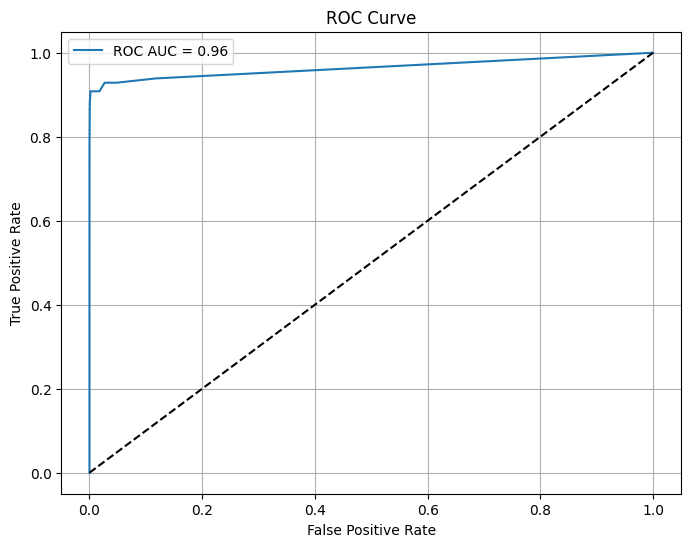

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_score:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


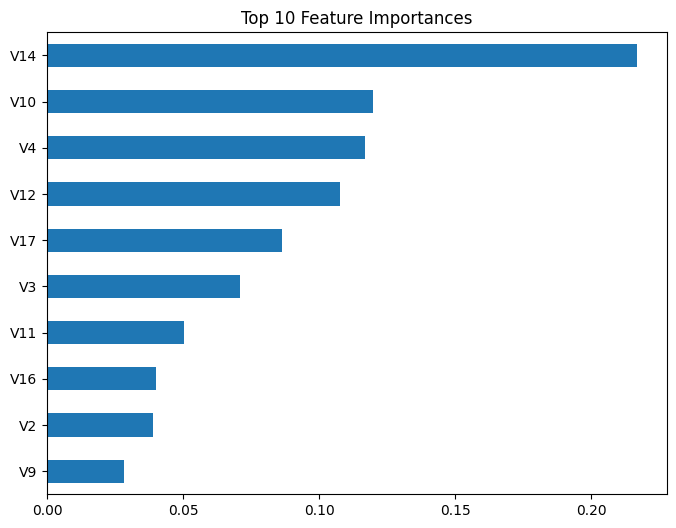

In [23]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.show()


##  Predict new transaction function

In [24]:
def predict_transaction(transaction_data, model):
    prediction = model.predict([transaction_data])
    return 'Fraud' if prediction[0]==1 else 'Legit'

# Example
sample = X_test.iloc[0]
print("Prediction:", predict_transaction(sample, rf))


Prediction: Legit


## Using XGBoost

In [25]:
!pip install xgboost


In [26]:
import xgboost as xgb

scale = (len(y_train_res) - sum(y_train_res)) / sum(y_train_res)

xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=scale,  # para el desbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Predicción y evaluación XGBoost

In [27]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred_xgb = xgb_clf.predict(X_test)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


ROC AUC: 0.9758803317331435
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56856     8]
 [   17    81]]


ROC AUC: 0.9759
This means this model has a 97.6% chance of correctly ranking a fraud transaction over a legitimate transaction.
Interpretation by Metric
Fraud Precision (0.91)
When XGBoost says "this is fraud," it has 91% accuracy; only 9% are false alarms (you block legitimate customers).

Fraud Recall (0.83)
It detects 83% of real frauds, meaning it misses 17% of frauds.

Fraud F1-score (0.87)
Balance between precision and recall. It's high.

For class 0 (non-fraud), it's almost perfect: precision and recall ≈ 1.00.
Confusion Matrix
8 legitimate individuals were harassed with fraud alerts (FP).

17 genuine frauds went undetected (FN).

The model with XGBoost dramatically reduces risk, detecting 83% of frauds, with only 8 false positives in almost 57,000 transactions, which is negligible in terms of customer friction.